In [ ]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Import Twitter Access Keys

from credentials import * #Allow us to use the keys as variables

#API setup

def twitter_setup():

    """
    Utility function to setup Twitter's API 
    with our access keys provided.
    """
    #Authentication and access using keys, the below is basically creating an OAuthInstance that has our information that wil automatically log us in.
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    #Return API with authentication
    api = tweepy.API(auth)
    return api




In [ ]:

#Create an extractor object:
#(I think this basically means that we use 
#the twitter_setup to log in and extract information)
extractor = twitter_setup()
    
#Create a tweet list:
#User_timeline returns the most 20 recent statuses from the user specified
#and has multiple parameters
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
#Using format as below allows you to put numbers in a character string
print("Number of tweets extracted: {}.\n".format(len(tweets)))
    
#We print the most recent 5 tweets:
#\n is a new line
print("5 recent tweets:\n")
#prints in the range up to 5 for tweets
for tweet in tweets[:5]:
    print(tweet.text)
    print()

#We create a pandas dataframe as follows

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns = ['Tweets'])

#We display the first 10 elements of the dataframe:
display(data.head(10))


In [ ]:
#Internal methods and metadata contained in a Tweet object in tweepy
print(dir(tweets[0]))

print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

In [ ]:
#Add metadata to Dataframe

#list comprehension : new_list = expression(i) for variable in old_List
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

#Display of first 10 elements from data frame
display(data.head(10))



In [ ]:
#We extract the mean of lengths

mean = np.mean(data['len'])

#Below is formatting a list when inputting variables
print("The length's average in tweets: {}".format(mean))

#We extract the tweet with more FAVs and more RTs, this uses the meta data we assigned above:
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])

#Below is finding the tweet that has the most likes by seeing if it has the same amount of like sas our fav_max variable
#Same for retweets
fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

#Max FAVs:

print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

#Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))


                     

In [ ]:
#Pandas Plotting
#Create a time series for data using Dataframe series function

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

#Lengths along time:

tlen.plot(figsize=(16,4), label = "Tweet Length", color='r', legend = True);





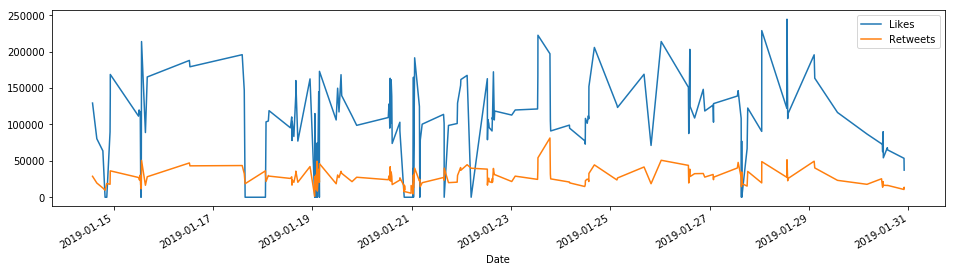

In [11]:
#Likes vs Retweets Visualization
#Can call plot on any variable to make a figure
tfav.plot(figsize=(16, 4), label= "Likes", legend=True)
tret.plot(figsize=(16, 4), label="Retweets", legend=True);


In [ ]:
#Piechart of sources

#We obtain all possible sources

sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

#Print sources list
print("Creation of content sources:")
for source in sources:
    print("*{}".format(source))

#Create a numpy vector maped to labels

percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
percent /= 100

#Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6,6));


    

In [ ]:
#Sentiment Analysis 

from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean th etext in a tweet by removing
    links and special characters using regex.
    '''
    
    return ' '.join(re.sub("([@A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    analysis = TextBlog(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return 1

#We create a column with the result of the analysis:

data['SA'] = np.array([analyze_sentiment(tweet) for tweet in data ['Tweets']])

#We display the updated dataframe with the new column

display(data.head(10))

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data ['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data ['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data ['SA'][index] < 0]


print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))